#**Evaluation**


*   load custom images and classify wearing a mask or not
*   show the test images and prediction or/and scores

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Transform = torchvision.transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize(size=(112, 112))
])

In [10]:
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
#from google.colab.patches import cv2_imshow
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
# 1. prepare data
path = r"C:\Users\phyou\Documents\AI\data"

from torchvision.datasets import ImageFolder

# write ImageFolder code below
data = ImageFolder(root=path, transform=Transform)
dataLoader = DataLoader(data, batch_size=100, num_workers=4)
print("Train data labels:", data.class_to_idx)

Train data labels: {'not_wearing_mask': 0, 'wearing_mask': 1}


In [12]:
# 2. load model
num_classes = 1 #마스크 유무 0 or 1
pretrained = False
model = models.resnet50(pretrained= pretrained)
model.fc = torch.nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)
model.load_state_dict(torch.load('ResNet_0.00704.pth')) 
loss = torch.nn.BCEWithLogitsLoss().to(device)

In [13]:
# 3. perform evaluation
classes = ['not wearing mask', 'wearing mask']
def val_model(dataloader, model, loss_fn):
    model.eval()
    
    with torch.no_grad():
        running_loss = 0
        acc_temp = 0

        for inputs, labels in tqdm(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            output = model(inputs).squeeze()
            running_loss += loss_fn(output, labels.float()).item() * inputs.size(0)
            output = torch.sigmoid(output)
            pred = torch.round(output)

            acc_temp += pred.eq(labels).sum().item()

            test_pred = pred[0].cpu()
            test = labels[0].cpu()
            
        acc = acc_temp / 100
        running_loss = running_loss / 100

        print(f'evaluation loss: {running_loss:.5f}, evaluation accuracy: {acc:.3f}')
        print(f'label: {classes[test.item()]}       predictions: {classes[int(test_pred.item())]}')
        dataiter = iter(data)
        images, labels = next(dataiter)
        image = images[1]
        plt.imshow(image)
        plt.show()

100%|██████████| 1/1 [00:05<00:00,  5.21s/it]


evaluation loss: 0.98959, evaluation accuracy: 0.760
label: not wearing mask       predictions: not wearing mask


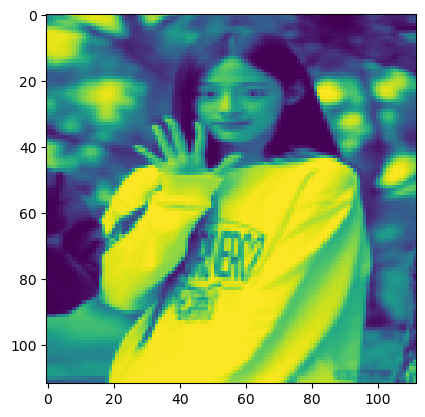

In [14]:
val_model(model=model, dataloader=dataLoader, loss_fn=loss)